---
title: "Annotating single points in datasets"
author: "Damien Martin"
date: "2024-05-01 11:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "How to annotate single data points in a plot"
---

# Problem

We don't want to annotate _all_ data points, only one or two extraordinary ones.

# Solution

Using `p9.annotate('text', ....)`, or making an additional data frame with the path on it and using `geom_path`.

In `ggplot` examples, it is common to see `annotate('curve', ...)` to draw an arrow. The `geom_curve` has _not_ been ported over to plotnine, so this won't work here.

# Example

In [2]:
import pandas as pd 
import plotnine as p9
from plotnine.data import mtcars

Using the built-in `mtcars` dataset, let's plot the horsepower vs miles-per-gallon:

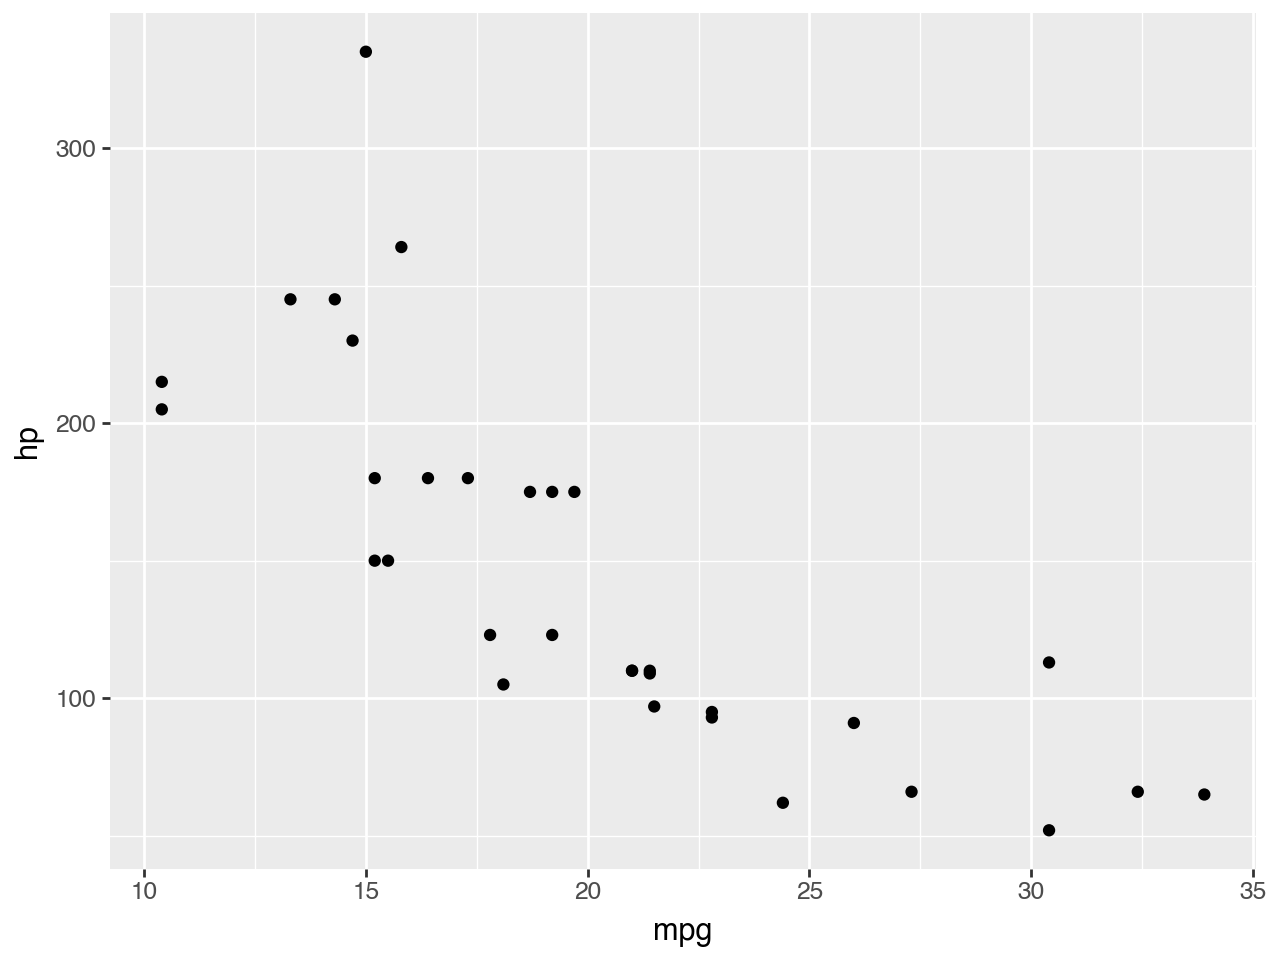

In [5]:
(
    p9.ggplot(mtcars, mapping=p9.aes(x='mpg', y='hp'))
    + p9.geom_point()
)

The top point stands out, let's identify it:

In [6]:
mtcars[mtcars.hp > 300]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


We could choose to annotate it directly:

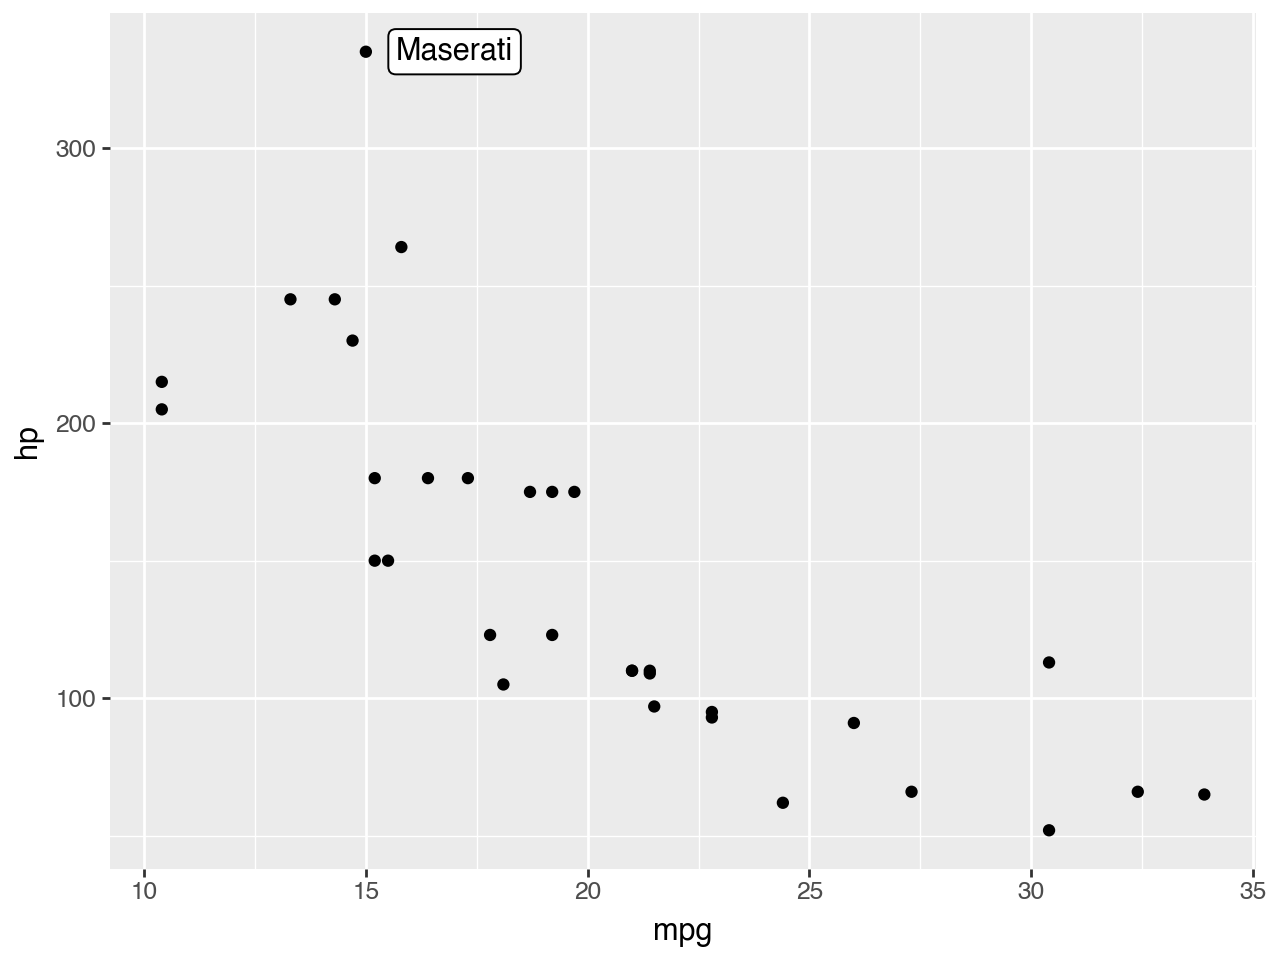

In [9]:
(
    p9.ggplot(mtcars, mapping=p9.aes(x='mpg', y='hp'))
    + p9.geom_point()
    + p9.annotate('label', x=17, y=335, label='Maserati')
)

We can also use the arrow technique, as shown in the [ggplot book](https://ggplot2-book.org/annotations)

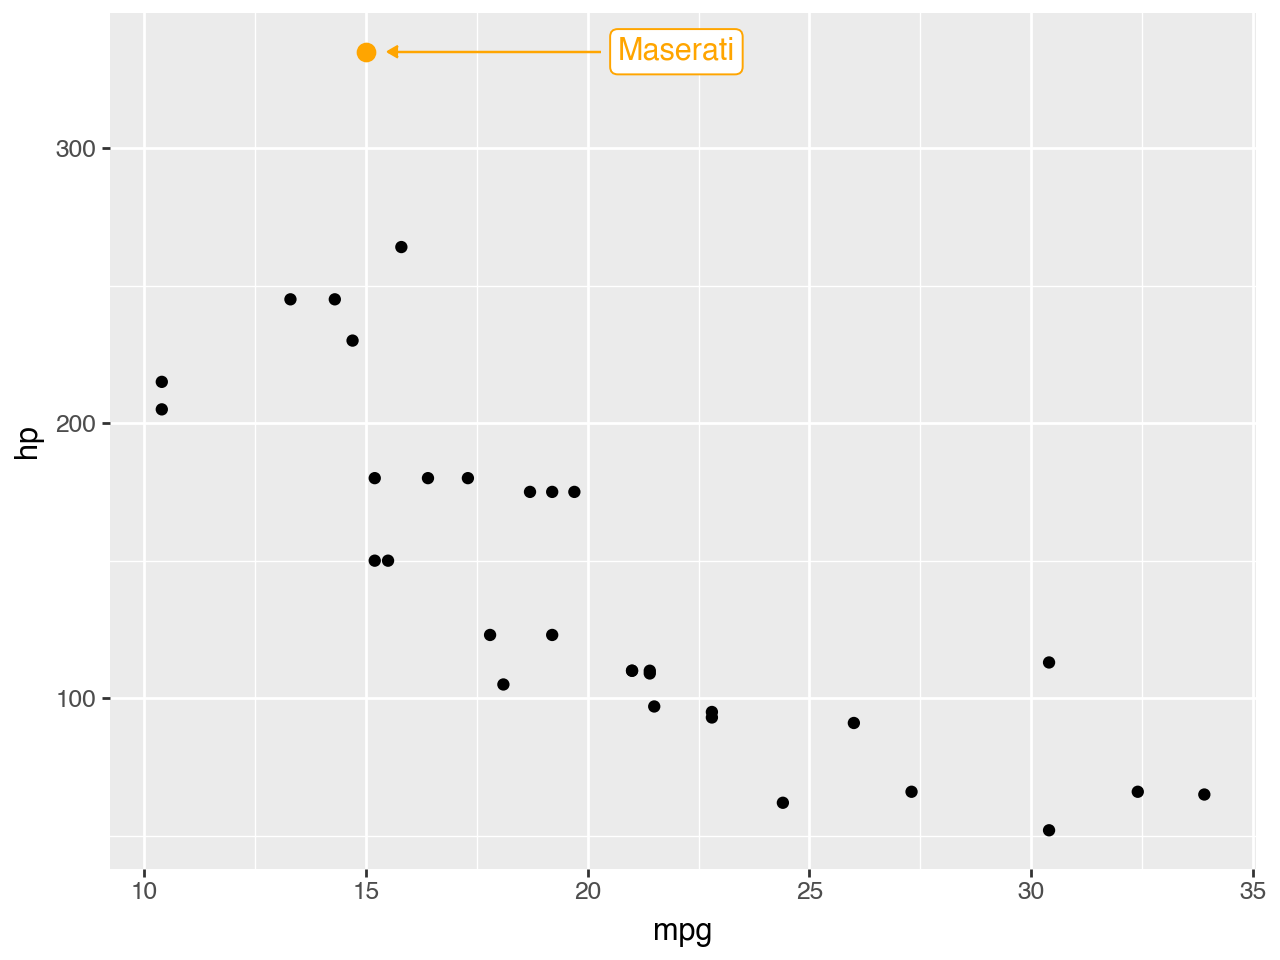

In [23]:
(
    p9.ggplot(mtcars, mapping=p9.aes(x='mpg', y='hp'))
    + p9.geom_point()
    + p9.geom_point(data=mtcars[mtcars['hp']>300], color='orange', size=3)
    + p9.annotate('label', x=22, y=335, label='Maserati', color='orange')
    + p9.geom_path(
        data=pd.DataFrame({'mpg': [20.3, 15.5], 'hp': [335, 335]}), 
        arrow=p9.arrow(length=0.05, ends="last", type="closed"),
        color='orange'
    )
)

## Alternative

This approach isn't quite as attractive, but it is a lot less manual (you don't really have to look at the data and decide exactly where to put the labels).

In [40]:
mtcars['rank'] = mtcars['hp'].rank(ascending=False)

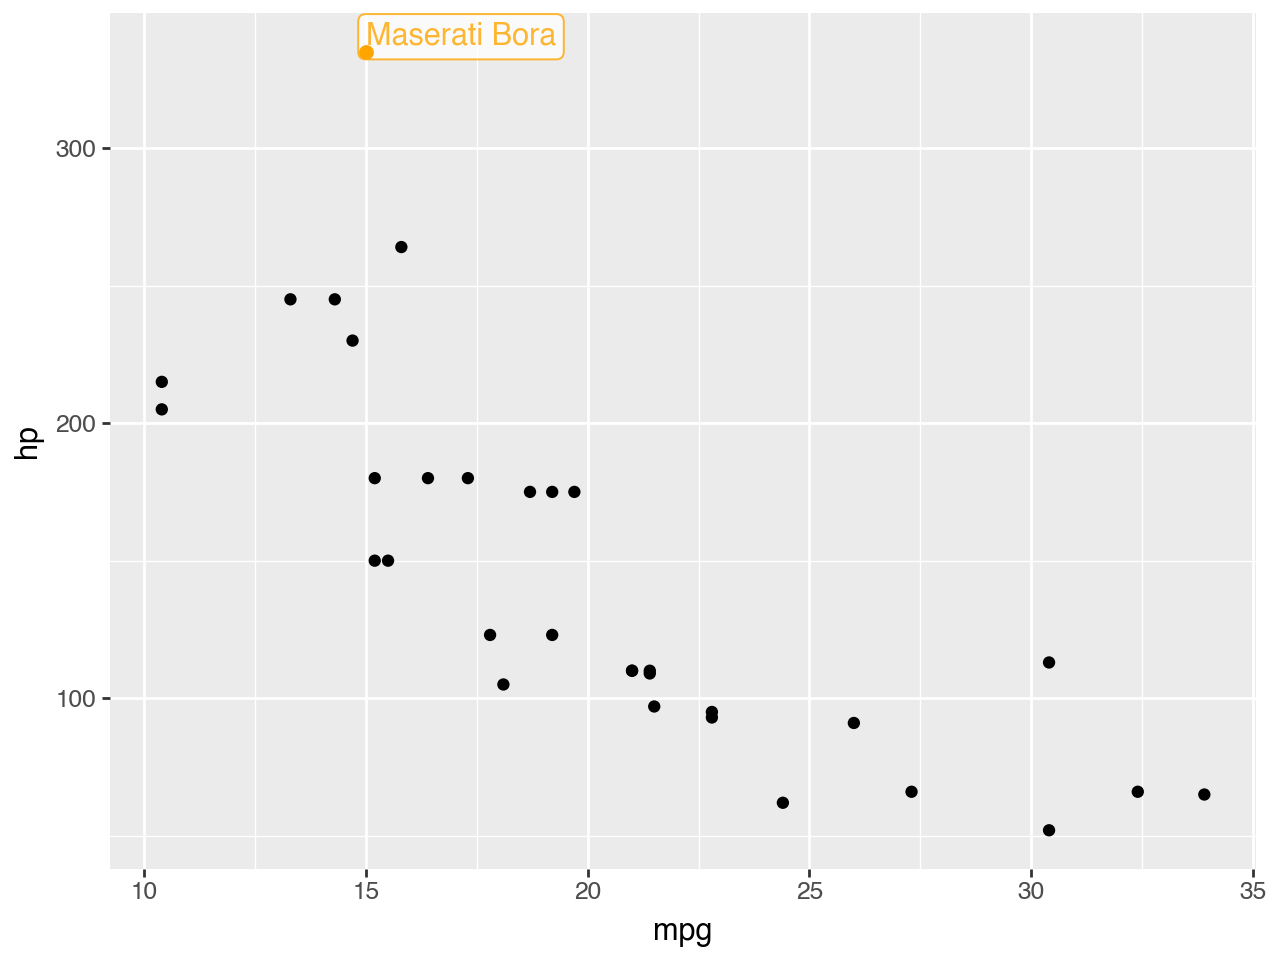

In [41]:
(
    p9.ggplot(mtcars, mapping=p9.aes(x='mpg', y='hp', label='name'))
    + p9.geom_point()
    + p9.geom_label(data=mtcars[mtcars['rank']==1], color='orange', va="bottom", ha="left", alpha=0.8)
    + p9.geom_point(data=mtcars[mtcars['rank']==1], color='orange', size=2)
)